<a href="https://colab.research.google.com/github/ayusakoc/GithubTest/blob/main/random_forest%2C_and_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb


In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
zero_exists = (df == 0).any()
print(zero_exists)

Artist Name           False
Track Name            False
Popularity            False
danceability          False
energy                False
key                   False
loudness              False
mode                   True
speechiness           False
acousticness           True
instrumentalness      False
liveness              False
valence               False
tempo                 False
duration_in min/ms    False
time_signature        False
Class                  True
dtype: bool


In [ ]:
df.head(3)



,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.0171,NaN,0.0849,0.899,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.0011,0.004010,0.1010,0.569,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.4860,0.000196,0.3940,0.787,147.681,109667.0,4,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [ ]:
df.drop("Artist Name", axis=1, inplace=True, errors='ignore')
df.drop("Track Name", axis=1, inplace=True, errors='ignore')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          17568 non-null  float64
 1   danceability        17996 non-null  float64
 2   energy              17996 non-null  float64
 3   key                 15982 non-null  float64
 4   loudness            17996 non-null  float64
 5   mode                17996 non-null  int64  
 6   speechiness         17996 non-null  float64
 7   acousticness        17996 non-null  float64
 8   instrumentalness    13619 non-null  float64
 9   liveness            17996 non-null  float64
 10  valence             17996 non-null  float64
 11  tempo               17996 non-null  float64
 12  duration_in min/ms  17996 non-null  float64
 13  time_signature      17996 non-null  int64  
 14  Class               17996 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 2.1 MB


In [ ]:
print(df.isnull().sum())

Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy="most_frequent")
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])  # Son sütun (Class) hariç

In [ ]:
print(df.isnull().sum())

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64


In [ ]:
correlation_matrix = df.corr()


In [ ]:
target_correlation = correlation_matrix["Class"].sort_values(ascending=False)
print("\nHedef değişkenle korelasyonlar:\n", target_correlation)


Hedef değişkenle korelasyonlar:
 Class                 1.000000
energy                0.217328
duration_in min/ms    0.203678
loudness              0.177872
Popularity            0.159302
time_signature        0.047989
liveness              0.045309
tempo                 0.031737
key                  -0.007495
instrumentalness     -0.038369
mode                 -0.044740
speechiness          -0.059349
valence              -0.075116
danceability         -0.097681
acousticness         -0.237138
Name: Class, dtype: float64


In [ ]:
x = df.drop(columns=["Class"])
y= df["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [ ]:
model = RandomForestClassifier(random_state=30, class_weight="balanced",max_depth=15)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, random_state=30)

In [ ]:
importances = model.feature_importances_


In [ ]:
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
})

In [ ]:
# Threshold belirleme
threshold = 0.05 # Örneğin, 0.05'ten düşük öneme sahip özellikleri bırak

# Düşük öneme sahip özellikleri belirleme
low_importance_features = importance_df[importance_df['Importance'] < threshold]['Feature']
print("Düşük öneme sahip özellikleri:")
print(low_importance_features)
# Düşük öneme sahip özellikleri eğitim ve test veri setlerinden kaldırma
X_train_filtered = X_train.drop(columns=low_importance_features)
X_test_filtered = X_test.drop(columns=low_importance_features)

# Filtrelenmiş verilerle modeli yeniden eğitme
model.fit(X_train_filtered, y_train)


Düşük öneme sahip özellikleri:
3                key
5               mode
9           liveness
11             tempo
13    time_signature
Name: Feature, dtype: object


RandomForestClassifier(class_weight='balanced', max_depth=15, random_state=30)

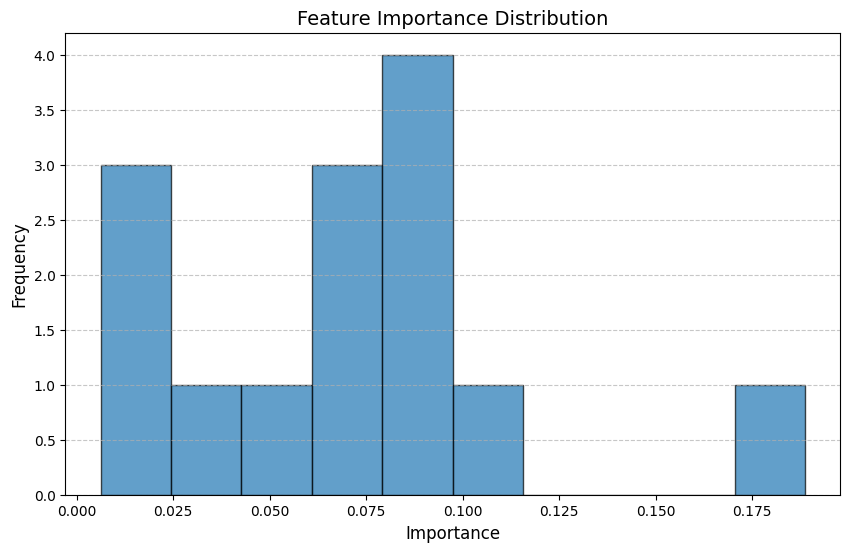

In [ ]:


# Histogram ile dağılımı görselleştirme
plt.figure(figsize=(10, 6))
plt.hist(importance_df['Importance'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Feature Importance Distribution', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




In [ ]:
model.score(X_test_filtered, y_test)

0.4955555555555556

In [ ]:
#accuricy
model.score(X_train_filtered, y_train)

0.8558627396499028

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Neural Network için hazırlık
# 1. Y hedefini one-hot encode yapma
y_train_encoded = to_categorical(y_train)  # Eğitim hedefi
y_test_encoded = to_categorical(y_test)  # Test hedefi

# 2. Filtrelenmiş X veri setini ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

# 3. Neural Network Modeli oluşturma
num_classes = y_train_encoded.shape[1]  # Sınıf sayısını belirle
input_dim = X_train_scaled.shape[1]  # Özellik sayısını belirle

model = Sequential([
    Dense(256, activation='relu', input_shape=(input_dim,)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])


# 4. Modeli derleme
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Multi-Class Classification için uygun loss
    metrics=['accuracy']
)

# 5. Modeli eğitme
history = model.fit(
    X_train_scaled, y_train_encoded,
    validation_data=(X_test_scaled, y_test_encoded),
    epochs=50,
    batch_size=32,
    verbose=1
)

# 6. Test verisinde değerlendirme
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f"Neural Network Test Accuracy: {test_accuracy:.2f}")











Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3110 - loss: 1.9414 - val_accuracy: 0.4800 - val_loss: 1.3902
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4467 - loss: 1.4929 - val_accuracy: 0.4936 - val_loss: 1.3357
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4607 - loss: 1.4454 - val_accuracy: 0.4997 - val_loss: 1.3116
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4841 - loss: 1.4054 - val_accuracy: 0.5044 - val_loss: 1.2985
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4814 - loss: 1.3846 - val_accuracy: 0.5033 - val_loss: 1.2953
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4860 - loss: 1.3724 - val_accuracy: 0.5058 - val_loss: 1.2831
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4887 - loss: 1.3675 - val_accuracy: 0.5086 - val_loss: 1.2931
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4936 - loss: 1.3458 - val_accuracy: 0.

In [ ]:

y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)  # Tahmin edilen sınıflar

# 10. Gerçek test etiketleri
y_test_labels = y_test

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import f1_score

# F1 Skoru hesaplama neural nw
f1 = f1_score(y_test_labels, y_pred, average='macro')
print(f"Macro F1 Skoru: {f1:.4f}")


Macro F1 Skoru: 0.5515


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix hesaplama
cm = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:")
print(cm)

def calculate_specificity(cm):
    specificity = {}
    num_classes = cm.shape[0]
    for i in range(num_classes):
        TN = np.sum(cm) - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        FP = cm[:, i].sum() - cm[i, i]
        specificity[i] = TN / (TN + FP) if (TN + FP) != 0 else 0
    return specificity

# Specificity hesaplama
specificity = calculate_specificity(cm)

class_names = ['0', '1', '2',"3","4","5","6","7","8","9","10"]
print("")
# Specificity yazdırma
for idx, spec in specificity.items():
    print(f"Specificity for class '{class_names[idx]}': {spec:.4f}")


Confusion Matrix:
[[102   0   0   7   8   0   0  10   0   8   1]
 [  0   1   7   0   0  11  53   0   4  37 173]
 [  0   0 113   0   0   6  14   0   2  36 110]
 [ 14   0   0  49  10   0   0   5   0   0   0]
 [ 12   0   0   0  50   0   0   2   0   6   1]
 [  0   0   7   0   0 187  13   0   1  38  16]
 [  0   2  13   0   0  27 134   0   8  53 263]
 [  3   0   0   1   0   0   0  99   0   0   0]
 [  0   0   0   0   0   1   9   0 156   3 213]
 [ 14   0  19   1   5  47  32   0   1 274 138]
 [  4   0  36   1  14  14  44   1  40  70 746]]

Specificity for class '0': 0.9864
Specificity for class '1': 0.9994
Specificity for class '2': 0.9753
Specificity for class '3': 0.9972
Specificity for class '4': 0.9895
Specificity for class '5': 0.9682
Specificity for class '6': 0.9468
Specificity for class '7': 0.9949
Specificity for class '8': 0.9826
Specificity for class '9': 0.9182
Specificity for class '10': 0.6521


In [ ]:
from sklearn.metrics import recall_score

# Geri Çağırma (Recall) hesaplama
recall = recall_score(y_test_labels, y_pred, average='macro')
print(f"Macro Recall (Geri Çağırma): {recall:.4f}")


Macro Recall (Geri Çağırma): 0.5568


In [ ]:
from sklearn.metrics import precision_score

# Kesinlik (Precision) hesaplama
precision = precision_score(y_test_labels, y_pred, average='macro')
print(f"Macro Precision (Kesinlik): {precision:.4f}")


Macro Precision (Kesinlik): 0.6038


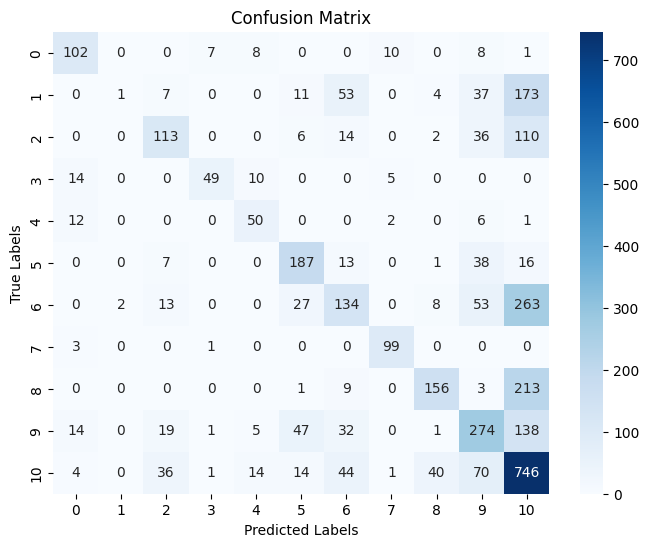

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix görselleştirme
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [1]:
import numpy as np
from sklearn.metrics import f1_score

rf_probabilities = model.predict(X_test_filtered)

rf_predictions = np.argmax(rf_probabilities, axis=1)

if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test.astype(int)

print("y_test_labels dtype:", y_test_labels.dtype)
print("y_test_labels shape:", y_test_labels.shape)
print("First 5 y_test_labels:", y_test_labels[:5])

print("rf_predictions dtype:", rf_predictions.dtype)
print("rf_predictions shape:", rf_predictions.shape)
print("First 5 rf_predictions:", rf_predictions[:5])

# Calculate F1 scores for random forest
f1_macro = f1_score(y_test_labels, rf_predictions, average='macro')
f1_weighted = f1_score(y_test_labels, rf_predictions, average='weighted')

print(f"Macro F1 Score: {f1_macro:.4f}")
print(f"Weighted F1 Score: {f1_weighted:.4f}")


NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall Score:", recall)

Recall Score: 0.5308333333333334


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred,average='macro')
print("Precision:", precision)

Precision: 0.6038205342840754


In [ ]:
def calculate_specificity(cm, class_names): # Add class_names as argument
    specificity = {}
    num_classes = cm.shape[0]
    for i in range(num_classes):
        TN = np.sum(cm) - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        FP = cm[:, i].sum() - cm[i, i]
        specificity[i] = TN / (TN + FP) if (TN + FP) != 0 else 0
    return specificity


class_names = ['class0', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10'] # Replace with your actual class names

specificity = calculate_specificity(cm, class_names) # Pass class_names to the function

# Sınıf isimlerini kullanarak özgüllüğü yazdırma
for idx, spec in specificity.items():
    print(f"Specificity for class '{class_names[idx]}': {spec:.4f}")

Specificity for class 'class0': 0.9864
Specificity for class 'class1': 0.9994
Specificity for class 'class2': 0.9753
Specificity for class 'class3': 0.9972
Specificity for class 'class4': 0.9895
Specificity for class 'class5': 0.9682
Specificity for class 'class6': 0.9468
Specificity for class 'class7': 0.9949
Specificity for class 'class8': 0.9826
Specificity for class 'class9': 0.9182
Specificity for class 'class10': 0.6521


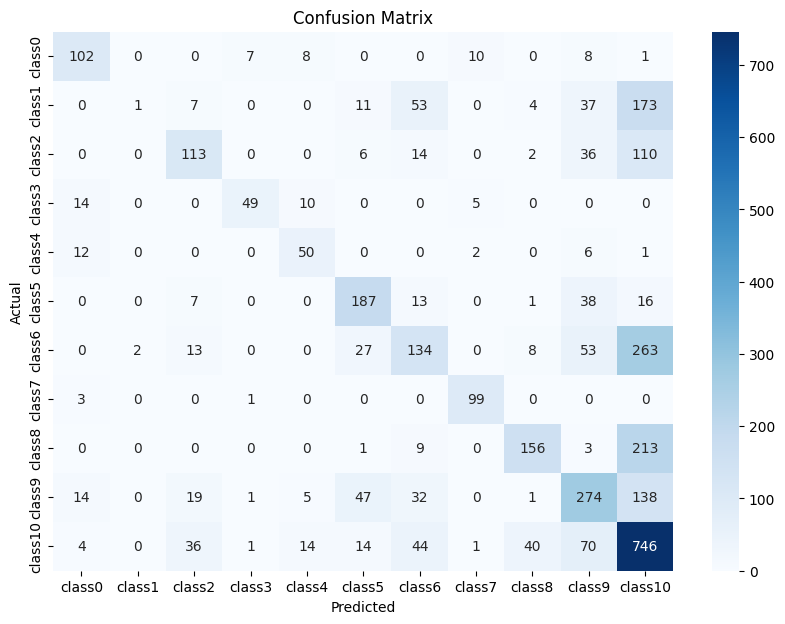

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

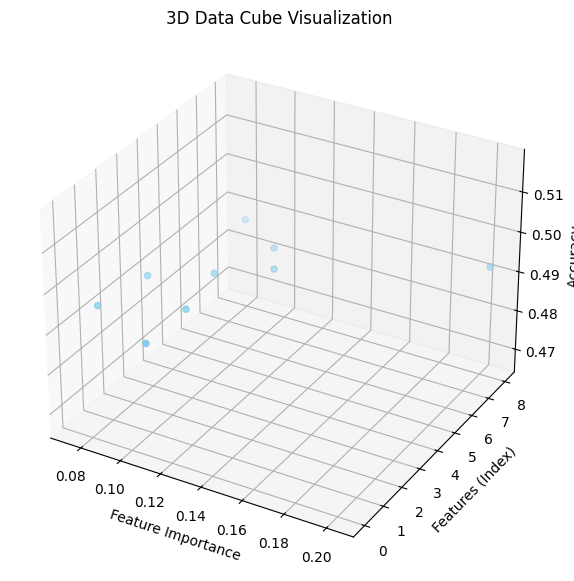

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(
    rf_data_cube['Importance_RF'],  # X-axis: Importance
    range(len(rf_data_cube)),       # Y-axis: Features (numerical index for simplicity)
    rf_data_cube['Accuracy_RF'],    # Z-axis: Accuracy
    c='skyblue', marker='o'
)


ax.set_xlabel('Feature Importance')
ax.set_ylabel('Features (Index)')
ax.set_zlabel('Accuracy')
ax.set_title('3D Data Cube Visualization')
plt.show()
